In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.shape

(20640, 10)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [10]:
invalid_ages = df[df["housing_median_age"] < 0]
print(invalid_ages)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [11]:
invalid_rows = df[df["total_bedrooms"] > df["total_rooms"]]
print(f"Rows where total_bedrooms > total_rooms: {len(invalid_rows)}")

Rows where total_bedrooms > total_rooms: 0


In [12]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
(207/20640) *100

1.002906976744186

In [14]:
df_cleaned = df.dropna()
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


In [16]:
print(df_cleaned["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [17]:
numerical_df = df_cleaned.select_dtypes(include=["number"])

# Calculate min, max, and range
min_values = numerical_df.min()
max_values = numerical_df.max()
range_values = max_values - min_values

# Create DataFrame for results
range_df = pd.DataFrame({"Min": min_values, "Max": max_values, "Range": range_values})

# Display results
print(range_df)

                           Min          Max        Range
longitude            -124.3500    -114.3100      10.0400
latitude               32.5400      41.9500       9.4100
housing_median_age      1.0000      52.0000      51.0000
total_rooms             2.0000   39320.0000   39318.0000
total_bedrooms          1.0000    6445.0000    6444.0000
population              3.0000   35682.0000   35679.0000
households              1.0000    6082.0000    6081.0000
median_income           0.4999      15.0001      14.5002
median_house_value  14999.0000  500001.0000  485002.0000


In [18]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ["housing_median_age", "total_rooms", "total_bedrooms", 
                    "population", "households", "median_income", "median_house_value"]

scaler = StandardScaler()

df_standard = df_cleaned.copy()

df_standard[columns_to_scale] = scaler.fit_transform(df_standard[columns_to_scale])

df_standard.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY


In [19]:
numerical_df = df_standard.select_dtypes(include=["number"])

# Calculate min, max, and range
min_values = numerical_df.min()
max_values = numerical_df.max()
range_values = max_values - min_values

# Create DataFrame for results
range_df = pd.DataFrame({"Min": min_values, "Max": max_values, "Range": range_values})

# Display results
print(range_df)

                           Min         Max      Range
longitude          -124.350000 -114.310000  10.040000
latitude             32.540000   41.950000   9.410000
housing_median_age   -2.194584    1.855769   4.050352
total_rooms          -1.205604   16.787125  17.992729
total_bedrooms       -1.274093   14.018707  15.292800
population           -1.254828   30.230881  31.485709
households           -1.303810   14.602967  15.906778
median_income        -1.775054    5.859665   7.634719
median_house_value   -1.662139    2.539456   4.201595


In [20]:
# Perform one-hot encoding on 'ocean_proximity' (replace with your categorical column)
df_one_encoded = pd.get_dummies(df_standard, columns=["ocean_proximity"], drop_first=False)

# Display first few rows
df_one_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,False,False,False,True,False
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,False,False,False,True,False
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,False,False,False,True,False
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,False,False,False,True,False
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,False,False,False,True,False


In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply label encoding to 'ocean_proximity' column
df_encoded = df_standard.copy()  # Create a copy to store encoded data
df_encoded["ocean_proximity_encoded"] = encoder.fit_transform(df_encoded["ocean_proximity"])

# Drop the original 'ocean_proximity' column if needed
df_encoded = df_encoded.drop(columns=["ocean_proximity"])

# Display first few rows of the new dataset
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,3
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,3
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,3
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,3
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,3


In [22]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Apply function to all numerical columns
outliers = df_encoded.select_dtypes(include=["float64", "int64"]).apply(detect_outliers_iqr)
print("🔹 Number of Outliers in Each Column:\n", outliers)

🔹 Number of Outliers in Each Column:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                1290
total_bedrooms             1271
population                 1190
households                 1212
median_income               670
median_house_value         1064
ocean_proximity_encoded    4898
dtype: int64


🔹 Skewness of Numerical Columns:
 longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


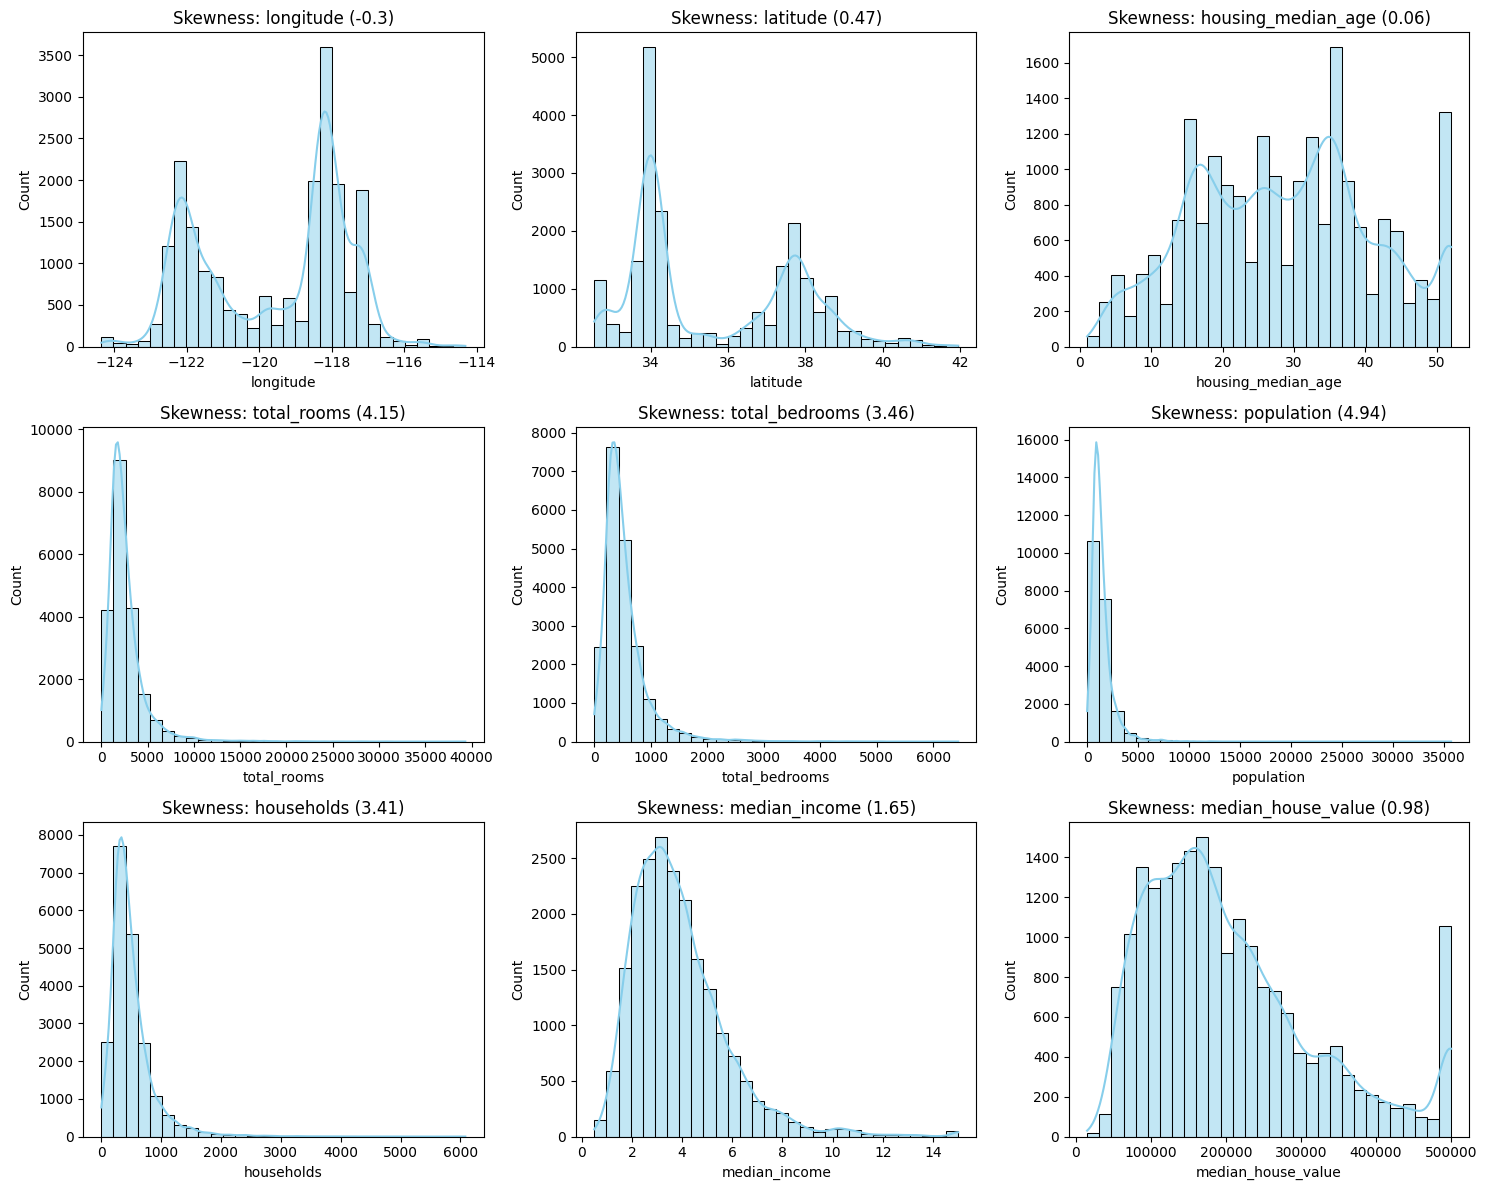

In [23]:
import seaborn as sns
import math
# Compute skewness
skewness = df.select_dtypes(include=["float64", "int64"]).skew()
print("🔹 Skewness of Numerical Columns:\n", skewness)

# Get all numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Define grid size dynamically
num_features = len(num_cols)
rows = math.ceil(num_features / 3)  # Auto adjust rows
cols = min(3, num_features)  # Max 3 columns per row

# Plot histograms with KDE
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Skewness: {col} ({round(skewness[col], 2)})")

plt.tight_layout()
plt.show()

In [24]:
df_transformed = df.copy()

# Columns that need transformation
cols_to_transform = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

# Apply log transformation (Adding 1 to avoid log(0) error)
df_transformed[cols_to_transform] = np.log1p(df_transformed[cols_to_transform])

# Verify new skewness after transformation
print("🔹 New Skewness After Log Transformation:\n", df_transformed[cols_to_transform].skew())

# Now df_transformed contains the transformed data separately


🔹 New Skewness After Log Transformation:
 total_rooms      -1.075533
total_bedrooms   -0.992813
population       -1.044087
households       -1.051607
median_income     0.226083
dtype: float64


In [25]:
df_transformed = df.copy()

# Columns that need transformation
cols_to_transform = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

# Apply log transformation (Adding 1 to avoid log(0) error)
df_transformed[cols_to_transform] = np.log1p(df_transformed[cols_to_transform])

# Verify new skewness after transformation
print("🔹 New Skewness After Log Transformation:\n", df_transformed[cols_to_transform].skew())

🔹 New Skewness After Log Transformation:
 total_rooms      -1.075533
total_bedrooms   -0.992813
population       -1.044087
households       -1.051607
median_income     0.226083
dtype: float64


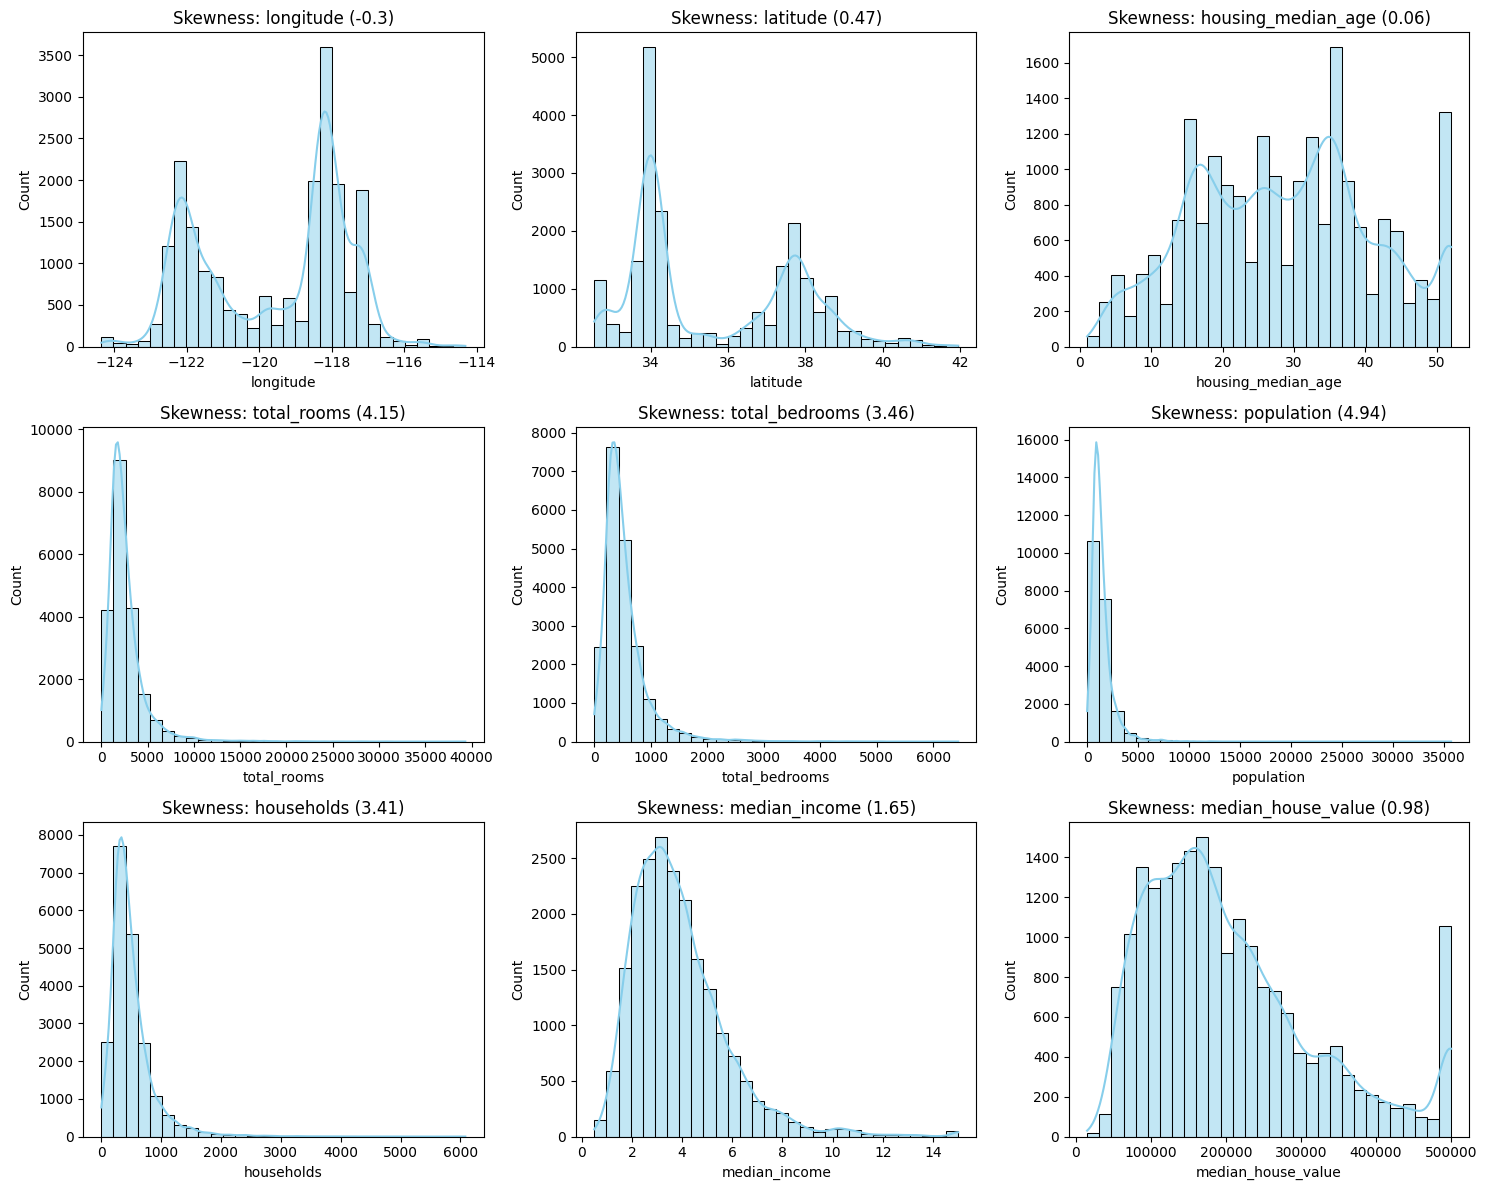

In [26]:
num_cols1 = df_transformed.select_dtypes(include=["float64", "int64"]).columns

# Define grid size dynamically
num_features = len(num_cols1)
rows = math.ceil(num_features / 3)  # Auto adjust rows
cols = min(3, num_features)  # Max 3 columns per row

# Plot histograms with KDE
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Skewness: {col} ({round(skewness[col], 2)})")

plt.tight_layout()
plt.show()

In [30]:
df_cleaned['median_income'].value_counts()

median_income
3.1250     49
15.0001    48
2.8750     46
4.1250     44
2.6250     44
           ..
1.7311      1
1.3942      1
3.7477      1
2.6774      1
2.4318      1
Name: count, Length: 12825, dtype: int64

                         longitude  latitude  housing_median_age  total_rooms  \
longitude                 1.000000 -0.924616           -0.109357     0.045480   
latitude                 -0.924616  1.000000            0.011899    -0.036667   
housing_median_age       -0.109357  0.011899            1.000000    -0.360628   
total_rooms               0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms            0.069608 -0.066983           -0.320451     0.930380   
population                0.100270 -0.108997           -0.295787     0.857281   
households                0.056513 -0.071774           -0.302768     0.918992   
median_income            -0.015550 -0.079626           -0.118278     0.197882   
median_house_value       -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity_encoded  -0.289530  0.200801            0.112330    -0.015363   

                         total_bedrooms  population  households  \
longitude                      0.069608  

<Axes: >

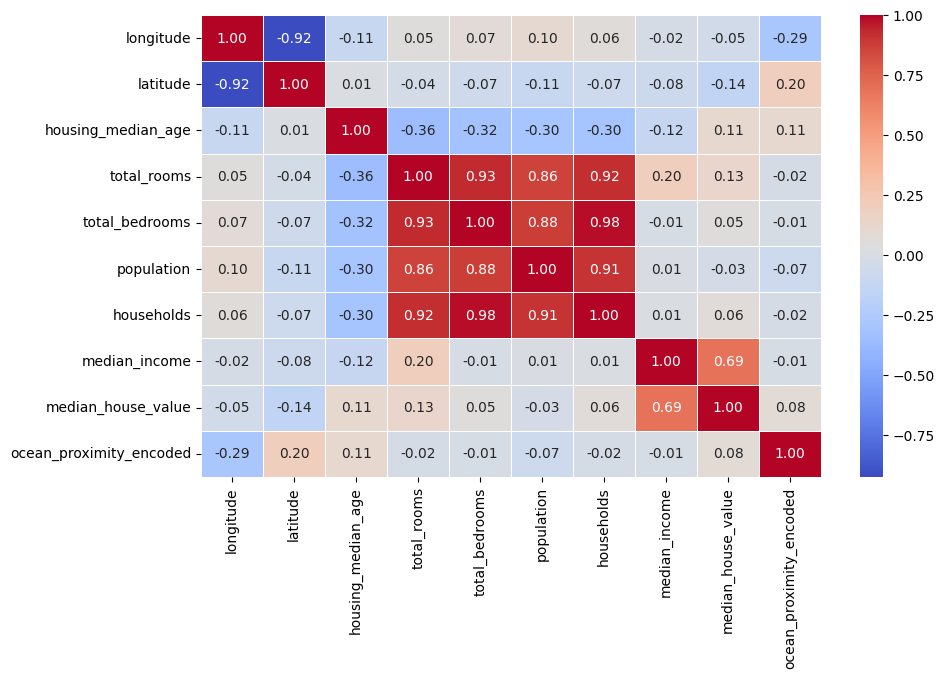

In [31]:
correlation_matrix = df_encoded.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924616           -0.109357   
latitude                    -0.924616  1.000000            0.011899   
housing_median_age          -0.109357  0.011899            1.000000   
total_rooms                  0.045480 -0.036667           -0.360628   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.100270 -0.108997           -0.295787   
households                   0.056513 -0.071774           -0.302768   
median_income               -0.015550 -0.079626           -0.118278   
median_house_value          -0.045398 -0.144638            0.106432   
ocean_proximity_<1H OCEAN    0.320831 -0.446928            0.045553   
ocean_proximity_INLAND      -0.055337  0.351084           -0.236968   
ocean_proximity_ISLAND       0.009501 -0.016662            0.017105   
ocean_proximity_NEAR BAY    -0.474714  0.358785            0.256149   
ocean_

<Axes: >

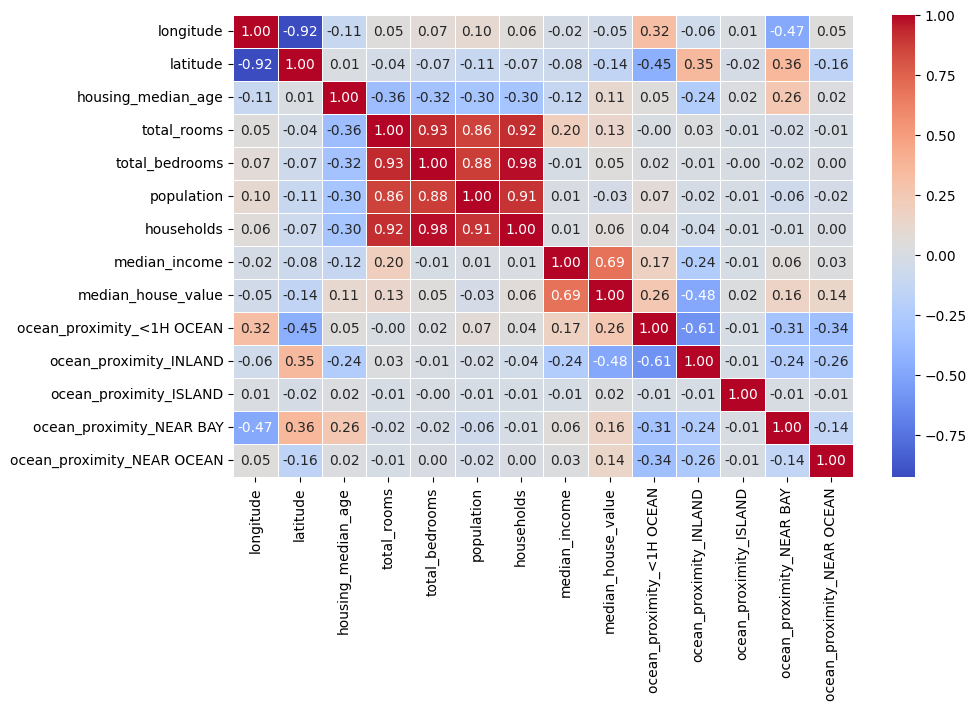

In [32]:
correlation_matrix_one = df_one_encoded.corr()

print(correlation_matrix_one)
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix_one, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [33]:
# Select only important features
selected_features = ["median_income", "population", "total_bedrooms","households"]

# Create new DataFrame with selected features
df_selected = df_encoded[selected_features]

# Display first few rows
df_selected.head()

,median_income,population,total_bedrooms,households
0,2.345163,-0.973320,-0.970325,-0.976833
1,2.332632,0.861339,1.348276,1.670373
2,1.782939,-0.819769,-0.825561,-0.843427
3,0.932970,-0.765056,-0.718768,-0.733562
4,-0.013143,-0.758879,-0.611974,-0.628930


In [49]:
from sklearn.preprocessing import PowerTransformer
# Selecting only numerical features (excluding target variable)
num_features = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method="yeo-johnson")  # Using Yeo-Johnson method
transformed_data = pd.DataFrame(pt.fit_transform(df_encoded[num_features]), columns=num_features)

# Display transformed DataFrame
print(transformed_data.head())

   total_rooms  total_bedrooms  population  households  median_income
0    -1.345650       -1.717169   -1.744400   -1.673502       1.871853
1     1.815557        1.471922    1.187274    1.619552       1.865873
2    -0.638047       -1.306507   -1.310353   -1.310827       1.586099
3    -0.855790       -1.026312   -1.165138   -1.032787       1.062747
4    -0.468462       -0.765258   -1.149053   -0.785216       0.229766


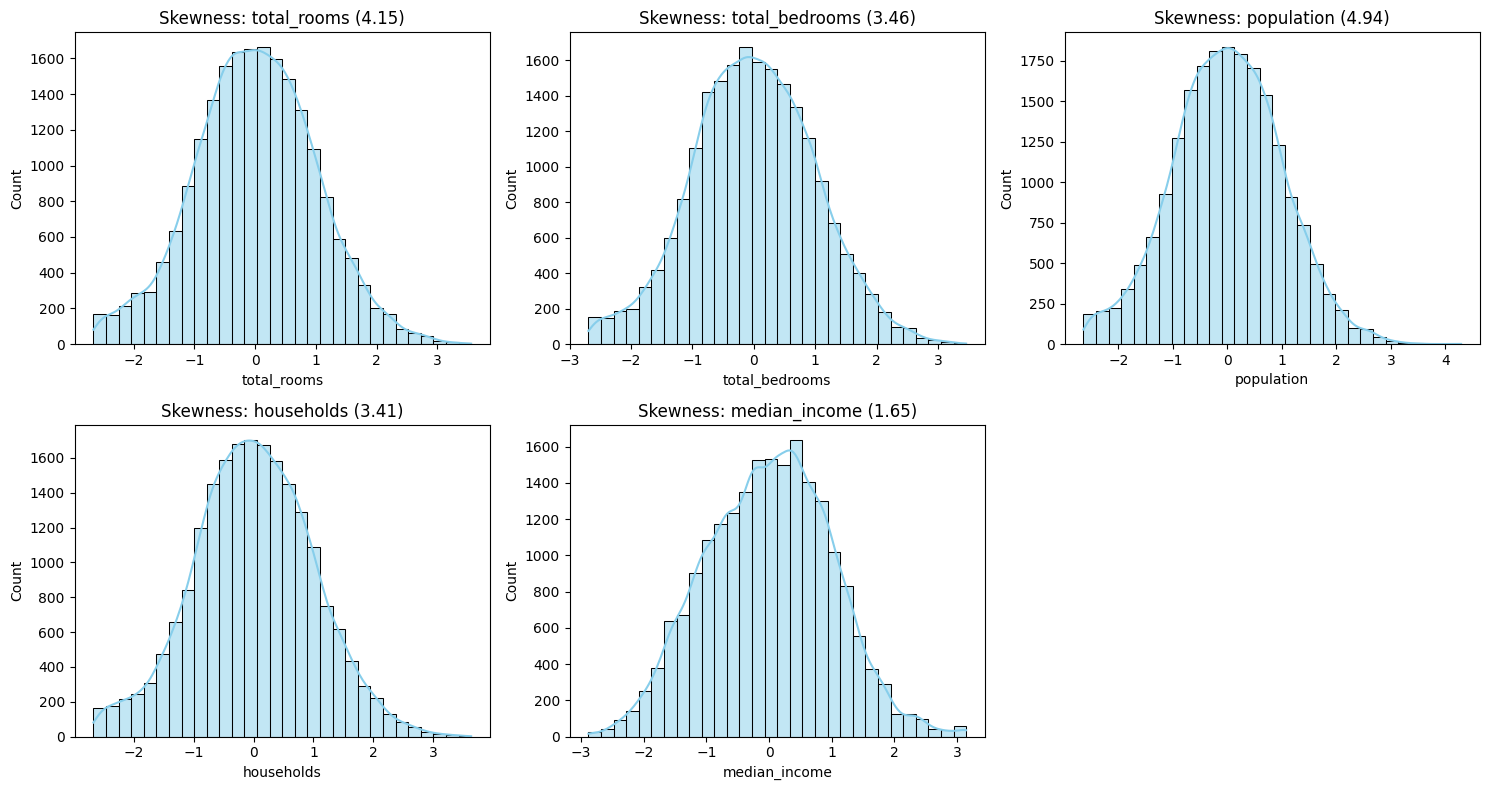

In [51]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols1 = transformed_data.select_dtypes(include=["float64", "int64"]).columns

# Ensure it's a list (optional)
num_cols1 = list(num_cols1)

# Get the number of features
num_features = len(num_cols1)

# Define grid size dynamically
rows = math.ceil(num_features / 3)  # Auto adjust rows
cols = min(3, num_features)  # Max 3 columns per row

# Plot histograms with KDE
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols1, 1):  
    plt.subplot(rows, cols, i)  
    sns.histplot(transformed_data[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Skewness: {col} ({round(skewness[col], 2)})")

plt.tight_layout()
plt.show()


In [56]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded[selected_features]  # Remove target column
y = df_encoded["median_house_value"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (16346, 4)
Testing Features Shape: (4087, 4)
Training Target Shape: (16346,)
Testing Target Shape: (4087,)



🔹 Model Performance Metrics:
📌 Mean Absolute Error (MAE): 0.53
📌 Mean Squared Error (MSE): 0.49
📌 Root Mean Squared Error (RMSE): 0.70
📌 R² Score: 0.5186


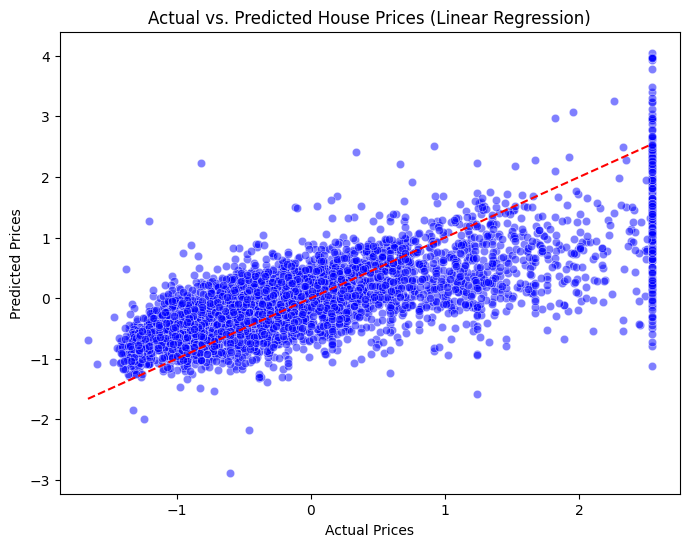

In [57]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 🔹 Step 5: Make Predictions
y_pred = lr_model.predict(X_test)

# 🔹 Step 6: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹 Model Performance Metrics:")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 7: Visualize Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

# Define scaler and fit on target variable before training
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Train the model using scaled target variable
lr_model.fit(X_train, y_train_scaled.ravel())

# Make predictions and inverse transform
y_pred_scaled = lr_model.predict(X_test)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Display original values
sample_df = pd.DataFrame({
    "Actual Price": y_test_original[:10].flatten(),
    "Predicted Price": y_pred_original[:10].flatten()
})

print("\n🔹 Sample Predicted vs. Actual House Prices (Original Scale):")
print(sample_df)



🔹 Sample Predicted vs. Actual House Prices (Original Scale):
   Actual Price  Predicted Price
0      0.334281        -0.193625
1     -0.597375         0.011775
2      0.095970        -0.215276
3      0.118420        -0.414375
4     -0.315892         0.203155
5     -1.140481        -0.725520
6      0.538054         0.470420
7      0.188359         0.324542
8      2.529163         1.370160
9     -1.090401        -0.598707


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluate Model
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest MAE: {rf_mae:.4f}")


Random Forest MAE: 0.4839


In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate Model
xgb_mae = mean_absolute_error(y_test, xgb_preds)
print(f"XGBoost MAE: {xgb_mae:.4f}")


XGBoost MAE: 0.4707


In [61]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X1 = df_cleaned[selected_features]  # Remove target column
y1 = df_cleaned["median_house_value"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Display the shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (16346, 4)
Testing Features Shape: (4087, 4)
Training Target Shape: (16346,)
Testing Target Shape: (4087,)



🔹 Model Performance Metrics:
📌 Mean Absolute Error (MAE): 61006.64
📌 Mean Squared Error (MSE): 6582620636.61
📌 Root Mean Squared Error (RMSE): 81133.35
📌 R² Score: 0.5186


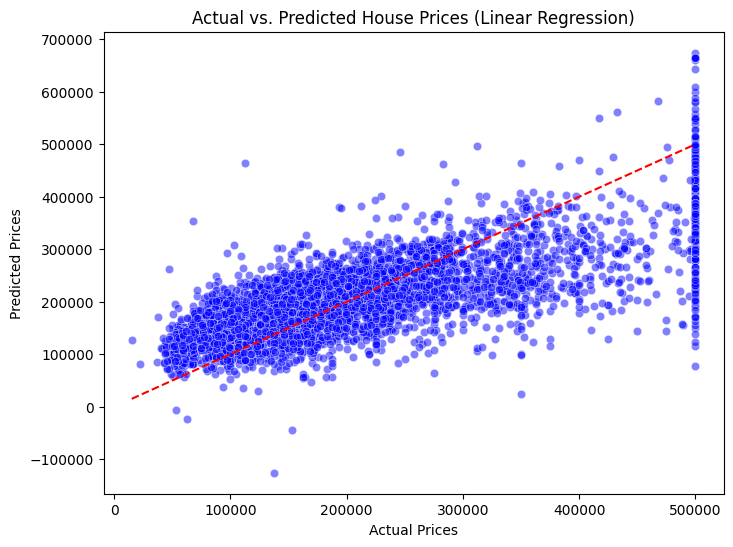

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 🔹 Step 5: Make Predictions
y_pred = lr_model.predict(X_test)

# 🔹 Step 6: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹 Model Performance Metrics:")
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 7: Visualize Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.show()

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np


# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate Model
xgb_mae = mean_absolute_error(y_test, xgb_preds)
print(f"XGBoost MAE: {xgb_mae:.4f}")


XGBoost MAE: 54331.4478
